**Dane Sabo**

*dane.sabo@pitt.edu*

*October 7th, 2024*


In [1]:
import numpy as np
import sympy as sm

def answer_print(question,string):
    print('\n=========FINAL ANSWER=========')
    print(question+':')
    print(string)
    print('=========FINAL ANSWER=========\n')

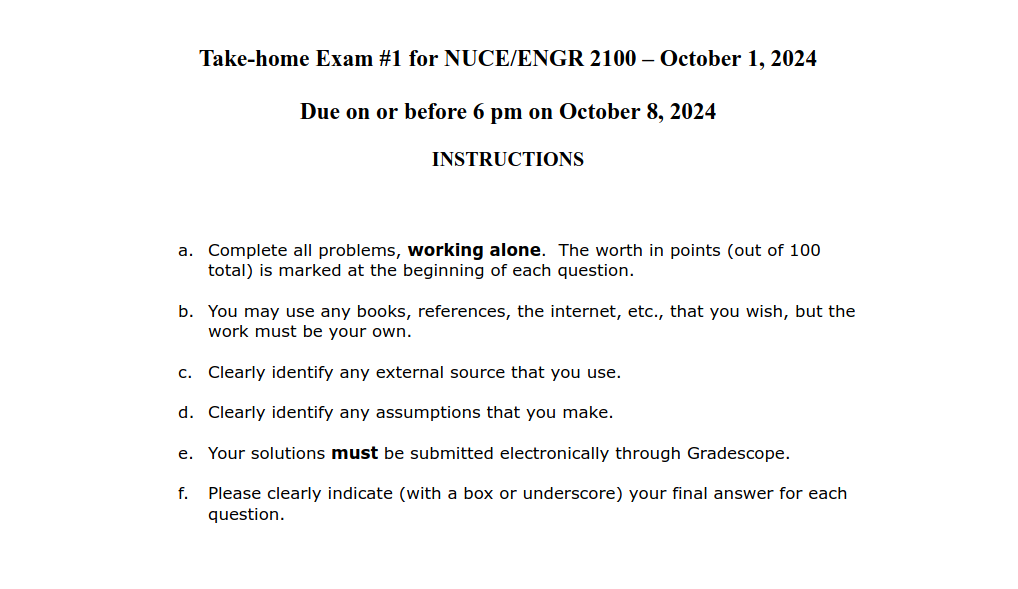

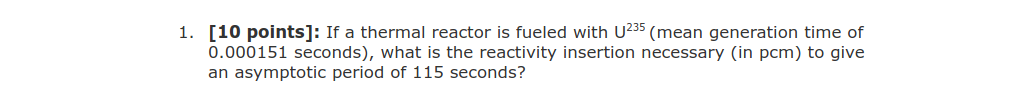

In [2]:
#Given information
l_star = 1.51e-4 #s
beta = np.array([0.00021, 0.00142, 0.00127, 0.00257, 0.00075, 0.00027]) #From 7.1 Slides
t_half = np.array([55, 23, 6.2, 2.3, 0.61, 0.23]) #From 7.1 Slides

#Find lambdas
lambduh = 0.693/t_half

#Find omega
omega = 1/115 #Hz

#Calculate Reactivity with Inhour Equation
rho = omega*l_star + np.sum(omega*beta/(omega+lambduh))
answer_print('Question 1',f"The reactivity insertion necessary is {rho:.6f} pcm.")


=========FINAL ANSWER=========
Question 1:
The reactivity insertion necessary is 0.000575 pcm.
=========FINAL ANSWER=========



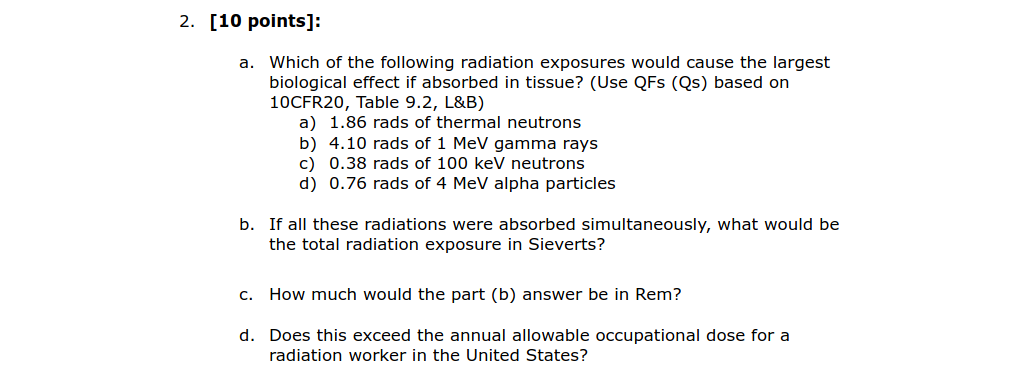

In [3]:
thermal_neutron_dose = 1.86 * 2 #rem 
gamma_ray_dose = 4.10 * 1 #rem
fast_neutron_dose = 0.38 * 7.5 #rem
alpha_particle_dose = 0.76 * 10 #rem

print(f'The thermal neutron equivalent dose is {thermal_neutron_dose:.3f} rem')
print(f'The gamma ray equivalent dose is {gamma_ray_dose:.3f} rem')
print(f'The fast neutron equivalent dose is {fast_neutron_dose:.3f} rem')
print(f'The alpha particle equivalent dose is {alpha_particle_dose:.3f} rem')

answer_print('Question 2a', 'The largest biological effect would be caused by the alpha particles.')

The thermal neutron equivalent dose is 3.720 rem
The gamma ray equivalent dose is 4.100 rem
The fast neutron equivalent dose is 2.850 rem
The alpha particle equivalent dose is 7.600 rem

=========FINAL ANSWER=========
Question 2a:
The largest biological effect would be caused by the alpha particles.
=========FINAL ANSWER=========



In [4]:
total_dose = thermal_neutron_dose + gamma_ray_dose + fast_neutron_dose + alpha_particle_dose

answer_print('Question 2b', f'The total dose is {total_dose/100:.3e} sieverts.')


=========FINAL ANSWER=========
Question 2b:
The total dose is 1.827e-01 sieverts.
=========FINAL ANSWER=========



In [5]:
answer_print('Question 2c', f'The total dose is {total_dose:.3e} rem.')


=========FINAL ANSWER=========
Question 2c:
The total dose is 1.827e+01 rem.
=========FINAL ANSWER=========



========FINAL ANSWER==========

Question 2d:

Yes, according to the NRC (https://www.nrc.gov/reading-rm/basic-ref/glossary/occupational-dose.html).
The maximum occupational dose per year is 5 rem. This dose would be over three times that allowable amount.

========FINAL ANSWER==========

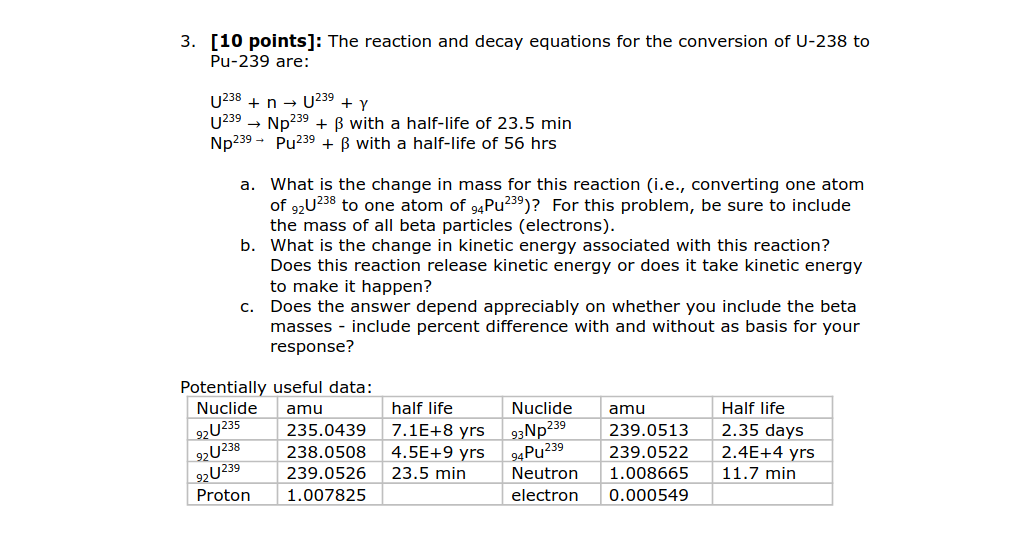

In [6]:
U238_mass = 238.0508 #amu
Pu239_mass = 239.0513 #amu
neutron_mass = 1.008665 #amu
electron_mass = 0.000549 #amu

# Part A
products = 1*Pu239_mass + 2*electron_mass
reactants = 1*U238_mass + 1*neutron_mass
change_in_mass = reactants - products

answer_print('Question 3a', f'{change_in_mass:.5e} amu')

# Part B
Q = change_in_mass * 931.5 #MeV
answer_print('Question 3b', f'The kinetic energy is {Q:.5e} MeV. \nThis reaction releases energy.')

# Part C
new_change_in_mass = reactants - 1*Pu239_mass #amu
new_Q = new_change_in_mass * 931.5 #MeV
percent_difference = (new_Q - Q)/Q *100

answer_print('Question 3c', f'The difference is significant. Without electrons, the result is {new_Q:.5e} MeV. \nThere is {percent_difference:.2f}% difference between the two answers.')



=========FINAL ANSWER=========
Question 3a:
7.06700e-03 amu
=========FINAL ANSWER=========


=========FINAL ANSWER=========
Question 3b:
The kinetic energy is 6.58291e+00 MeV. 
This reaction releases energy.
=========FINAL ANSWER=========


=========FINAL ANSWER=========
Question 3c:
The difference is significant. Without electrons, the result is 7.60570e+00 MeV. 
There is 15.54% difference between the two answers.
=========FINAL ANSWER=========



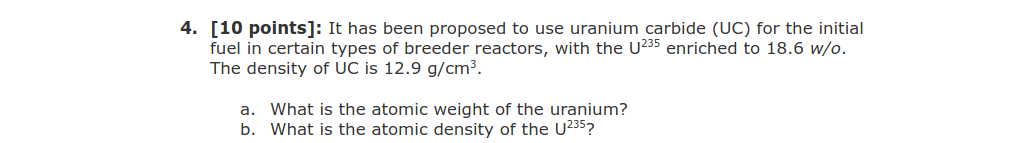

In [7]:
#Assuming other uranium isotopes in trace quantities...
U235_mass = 235.9439 #amu
enrichment = 18.6
UC_density =12.9 #g/cm^3

# Part A
A_U = 1/(1/100*(enrichment/U235_mass + (100-enrichment)/U238_mass))
answer_print('Question 4a', f'The atomic weight of the uranium is {A_U:.4f} amu.')

# Part B
C12_mass = 12 #amu

# Calculate molecule mass
A_UC = A_U + C12_mass

# Find weight percent U235
w_o_U235 = U235_mass/A_UC*100

# Find density of U235 component
U235_density = w_o_U235*UC_density/100

# Calculate atomic density
N_U235 = enrichment/100*U235_density*6.0221409e23/U235_mass

answer_print('Question 4b', f'The atomic density of U235 in UC is {N_U235:.4e} atoms/cm^3.')



=========FINAL ANSWER=========
Question 4a:
The atomic weight of the uranium is 237.6561 amu.
=========FINAL ANSWER=========


=========FINAL ANSWER=========
Question 4b:
The atomic density of U235 in UC is 5.7878e+21 atoms/cm^3.
=========FINAL ANSWER=========



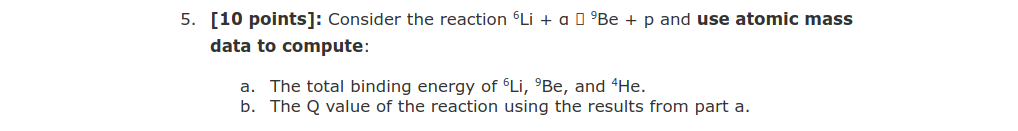

In [8]:
# Part A
def binding_energy(Z, N, Mass):
    H_mass = 1.007825032 #amu
    neutron_mass = 1.00866491578 #amu
    mass_defect = Z*H_mass + N*neutron_mass - Mass #amu
    binding_energy = mass_defect * 931.5 #MeV
    return binding_energy

Li6_mass = 6.015122 #amu
Be9_mass = 0.012183 #amu
He4_mass = 4.002603 #amu

answer_print('Question 5a',
             f'Lithium-6 Binding Energy: {binding_energy(3, 3, Li6_mass):.4e} MeV\n'+
             f'Beryllium-9 Binding Energy: {binding_energy(4, 5, Be9_mass):.4e}MeV\n'+
             f'Helium-4 Binding Energy: {binding_energy(2, 2, He4_mass):.4e}MeV')

# Part B
reactants = binding_energy(3, 3, Li6_mass) + binding_energy(2, 2, He4_mass)
products = binding_energy(4, 5, Be9_mass)
Q = products - reactants

answer_print('Question 5b', f'{Q:.4e} MeV')



=========FINAL ANSWER=========
Question 5a:
Lithium-6 Binding Energy: 3.1995e+01 MeV
Beryllium-9 Binding Energy: 8.4417e+03MeV
Helium-4 Binding Energy: 2.8296e+01MeV
=========FINAL ANSWER=========


=========FINAL ANSWER=========
Question 5b:
8.3814e+03 MeV
=========FINAL ANSWER=========



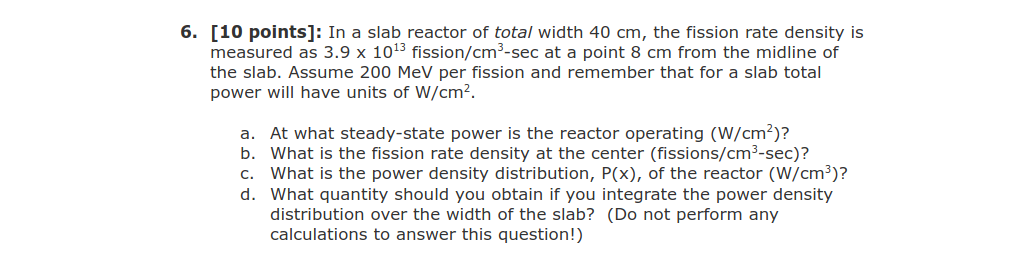

In [9]:
# Part A
Phi_times_Sigma_f = 3.9e13 #fission/cm^3/s
E_r = 200 * 1.60218e-13 #J/fission
a = 40 #cm

$$\phi(8) = \frac{P \pi}{2a E_r \Sigma_f} \cos\left(\frac{\pi 8}{40}\right)$$

$$\frac{ \phi(8) \Sigma_f E_r 2 a}{\pi \cos \left( \frac{\pi 8}{40} \right)} = P$$

In [10]:
P = Phi_times_Sigma_f * E_r * 2 * a / np.pi / np.cos(np.pi*8/40)
answer_print('Question 6a', f'{P:4e} W/cm^2')


=========FINAL ANSWER=========
Question 6a:
3.933584e+04 W/cm^2
=========FINAL ANSWER=========



**Part B**
$$ \phi(20) \Sigma_f = \frac{P \pi}{2a E_r} \cos \left( \frac{\pi}{2} \right) $$
$$ \phi(20) \Sigma_f = \frac{P \pi}{2a E_r} \times 0 $$


========FINAL ANSWER==========

$\phi(20) \Sigma_f =  0$

========FINAL ANSWER==========


**Part C**

$$P(x) = \phi(x) \Sigma_f E_r = \frac{P \pi}{2a E_r} \cos \left( \frac{\pi x}{a} \right) \times E_r $$
$$P(x) = \frac{P \pi}{2a} \cos \left( \frac{\pi x}{a} \right) $$

========FINAL ANSWER==========

$P(x) = \frac{P \pi}{2a} \cos \left( \frac{\pi x}{a} \right) $

where

$P = 3933.6 \frac{\text{W}}{\text{cm}^2}$

$a = 40 \text{cm}$

$E_r =  200 \text{MeV} \times  1.60218\times 10^{-13} \frac{\text{J}}{\text{MeV}}$

========FINAL ANSWER==========

**Part D**


========FINAL ANSWER==========

I should get the value I obtained in Part A!

========FINAL ANSWER==========

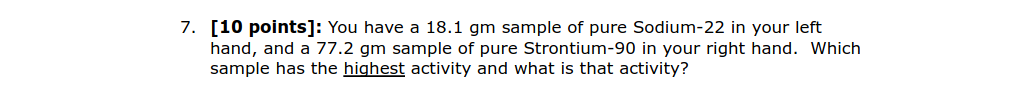

In [11]:
"""
Data pulled from https://www-nds.iaea.org/relnsd/vcharthtml/VChartHTML.html
"""
Na22_mass = 18.1 #g
Na22_half_life = 8_210_481_069_425 #s, beta decay
Na22_lambda = 0.693/Na22_half_life #decay/nuclei/s
Na22_N = Na22_mass*6.022141e23 / 21994437.55e-6 #nuclei
Na22_activity = Na22_lambda * Na22_N #decay/s

Sr90_mass = 77.2 #g
Sr90_half_life = 912_310_730_946_708 #s, beta decay
Sr90_lambda = 0.693/Sr90_half_life #decay/nuclei/s
Sr90_N = Sr90_mass*6.022141e23 / 89907727e-6 #nuclei
Sr90_activity = Sr90_lambda * Sr90_N #decay/s

print(f'Sodium-22 Activty: {Na22_activity:.3e} decay/s')
print(f'Strontium-90 Activty: {Sr90_activity:.3e} decay/s')

answer_print('Question 7',f'The sodium sample has higher activity.\nIt has {Na22_activity:.3e} decays/second compared to the Strontium sample\'s {Sr90_activity:.3e} decays/second.')

Sodium-22 Activty: 4.183e+10 decay/s
Strontium-90 Activty: 3.928e+08 decay/s

=========FINAL ANSWER=========
Question 7:
The sodium sample has higher activity.
It has 4.183e+10 decays/second compared to the Strontium sample's 3.928e+08 decays/second.
=========FINAL ANSWER=========



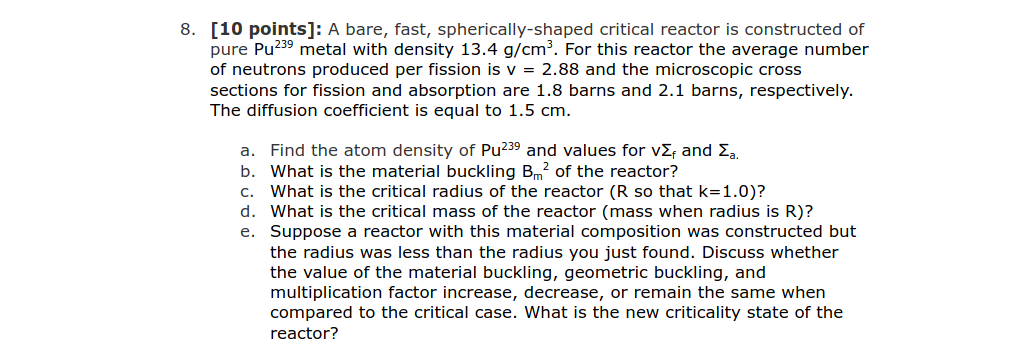

In [12]:
Pu239_density = 13.4 #g/cm^3
v = 2.88
sigma_f = 1.8e-24 #cm^2
sigma_a = 2.1e-24 #cm^2
D = 1.5 #cm

# Part A
N_Pu239 = 100/100*Pu239_density*6.0221409e23/Pu239_mass
answer_print('Question 8a', f'The atomic density of Pu239 in this reactor is {N_Pu239:.4e} atoms/cm^3.')

# Part B
Sigma_f = sigma_f*N_Pu239 #1/cm
Sigma_a = sigma_a*N_Pu239 #1/cm
B_m_squared = (v*Sigma_f - Sigma_a)/D 
answer_print('Question 8b', f'{B_m_squared:.3e} 1/cm^2')


=========FINAL ANSWER=========
Question 8a:
The atomic density of Pu239 in this reactor is 3.3757e+22 atoms/cm^3.
=========FINAL ANSWER=========


=========FINAL ANSWER=========
Question 8b:
6.940e-02 1/cm^2
=========FINAL ANSWER=========



**Part C:**

For K = 1, $B_g^2 = B_m^2$:
$$ \left( \frac{\pi}{R} \right)^2 = \frac{v \Sigma_f - \Sigma_a}{D} $$
$$ \left( \frac{\pi}{R} \right) = \sqrt{ \frac{v \Sigma_f - \Sigma_a}{D} }$$
$$ R = \frac{\pi} {\sqrt{ \frac{v \Sigma_f - \Sigma_a}{D} }}$$

In [13]:
R = np.pi/(B_m_squared)**(1/2)
answer_print('Question 8c', f'{R:.3e} cm')

# Part D
critical_mass = Pu239_density*(4/3*np.pi*R**3)
answer_print('Question 8d', f'{critical_mass:.3e} kg')


=========FINAL ANSWER=========
Question 8c:
1.192e+01 cm
=========FINAL ANSWER=========


=========FINAL ANSWER=========
Question 8d:
9.518e+04 kg
=========FINAL ANSWER=========



========FINAL ANSWER==========

**Part E**

If radius decreases:
1. Mateiral buckling will **stay the same**.
2. Geometric buckling will **increase**.
3. Multiplication factor will **decrease**. 

========FINAL ANSWER==========

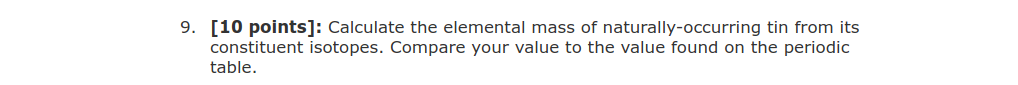

In [14]:
"""
Here is where I found a list of isotope abuncance and masses:
https://en.wikipedia.org/wiki/Isotopes_of_tin
"""
tin_stats = np.array([
    [112, 114, 115, 116, 117, 118, 119, 120, 122, 124], #Number
    [111.9048249, 113.90278013, 114.903344695, 115.90174283, 116.90295404, 117.90160663, 118.90331127, 119.90220256, 121.9034455, 123.9052796], # atomic mass (amu)
    [0.0097, 0.0066, 0.0034, 0.1454, 0.0768, 0.2422, 0.0859, 0.3258, 0.0463, 0.0579] # Abundance
])

tin_elemental_mass = np.sum(tin_stats[1,:]*tin_stats[2,:])

"""
For a periodic table, I am using the result when you just Google 'Periodic table'.
https://www.google.com/search?kgmid=%2Fm%2F05rbs&hl=en-US&q=Periodic%20table&shndl=17&source=sh%2Fx%2Fkp%2Fosrp%2Fm5%2F1&kgs=91de64a89fb9bd4b
"""
tin_perioic_table = 118.71 #amu

answer_print('Question 9', f'My calculated value for elemental mass of tin is {tin_elemental_mass:.5f}.\nThe periodic table value is {tin_perioic_table:.5f}.\nThat is a {(tin_elemental_mass-tin_perioic_table)/tin_perioic_table*100:.5f}% error.')


=========FINAL ANSWER=========
Question 9:
My calculated value for elemental mass of tin is 118.71011.
The periodic table value is 118.71000.
That is a 0.00010% error.
=========FINAL ANSWER=========



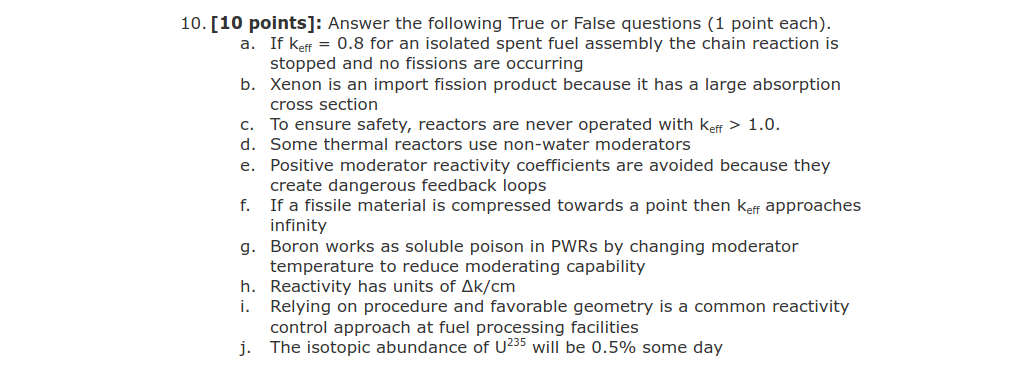

| Question | True / False |
| ------- | -------|
| 10A | False |
| 10B | True |
| 10C | False |
| 10D | True |
| 10E | True |
| 10F | True |
| 10G | True |
| 10H | False |
| 10I | True |
| 10J | True |